# Clustering Analysis
For this clustering analysis, I will keep analyzing my NYC Bike Load Data, chosen in Homework 1. Form the previous analysis, I notice that there is dominant difference between the precipitation and Bike Load. So I would like to apply clustering analysis to see if we can determine whether or not we have precipitation based on the Bike Load of the bridges, including Brooklyn Bridge, Manhattan Bridge, Williamsburg Bridge, and Queensboro Bridge.  

In this cluster analysis, the feature vectors will be the bike load of the bridges. The vector will have 4 columns, each vector represents a day. And it will have 4 features, each represented by the Bike load of one bridge. Ideally after we finish clustering, we will find 2 clusters, one of which will be the days with precipitation, and the other one will be the days with no precipitation.

## Step1: get the data
In this analysis we needs 4 columns of data

In [18]:
import sqlite3
import pandas as pd
from pprint import pprint
from pandas import DataFrame
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import math
import numpy as np
conn = sqlite3.connect('bicycle.db')
c=conn.cursor()
c.execute('SELECT Precip, Manhattan, Brooklyn, Williamsburg, Queensboro FROM bicycle')
data=c.fetchall()
Data=DataFrame(data, columns=[ 'Precip', 'Manhattan', 'Brooklyn', 'Williamsburg', 'Queensboro'])

## Step2: Modify the data
We will keep using the old database prepared in Homework 1. Since we are only trying to cluster the data vectors into 2 clusters, we would like to preprocess the data. So that the days with precipitation will be represented by 1 and the days without precipitation will be represented by 0. 

In [19]:
#pprint(Data)
for x in range(0,len(Data)):
    if (Data.loc[x,'Precip']>0):
        Data.loc[x, 'Precip']=1
#pprint(Data)


## Step3: Testing with 2 features first 
For a visualization purpose, we would like to start with 2 features (bike load of two brideges). In that we can plot them a look at the data visually. 

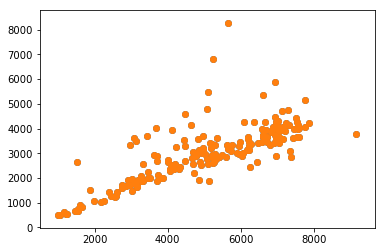

In [21]:
features=np.array(Data[['Manhattan', 'Brooklyn']])
plt.scatter (features[:,0], features[:, 1])
plt.show()

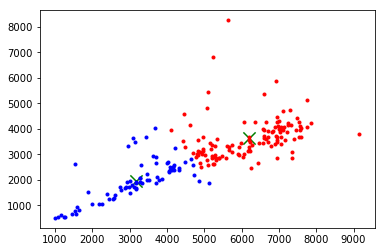

In [31]:
clf= KMeans (n_clusters=2)
clf.fit(features)
cetroids=clf.cluster_centers_
labels=clf.labels_
colors=["b.", "r."]
for i in range (len(features)):
    plt.plot(features[i][0], features[i][1], colors[labels[i]])
plt.scatter(cetroids[:,0], cetroids[:, 1], marker='x', s=150, linewidths=50,c="g" )
plt.show()
    

In [47]:
precip=np.array(Data['Precip'])
pprint(precip)
pprint(labels)

array([ 1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0

## Step4: Result analysis
By looking at hte data and the data and the labels, we see that 0 represent blue which should be the days with positive precipitaion, because we should have less bike load when it's raining. That means what when data['precip'] =1 the label should be 0. by knowing that we can check how many data are miss classified. In that we can check how well this clustering models works to correctly classifying a future new data 

In [60]:

precip=np.array(Data['Precip'])
true=0
for i in range(0,len(precip)):
    if ((precip[i]+labels[i])==1): # when correctly classified, precip=0, label=1; or precip=1, label=0
        true=true+1
pprint (true)   
print('% of correct prediction is ')
print(true/len(precip))

144
% of correct prediction is 
0.7346938775510204
